# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо определить рыночную стоимость объектов недвижимости, установив параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


Описание данных:

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении


**Ход исследования**

О качестве данных ничего неизвестно, поэтому, перед тем как перейти к исследованию, необходимо будет провести обзор данных.

Проведем обзор данных и поищем возможность исправить ошибки, которые могут привести к искажению конечных результатов. Проведем исследовательский анализ и сформируем общий вывод.

Таким образом, наше исследование пройдет в 4 этапа:

- Загрузка и обзор данных;
- Предобработка данных;
- Исследовательский анализ, который включает в себя:
    - Изучение параметров объектов;
    - Скорость продажи объектов;
    - Факторы, влияющие на стоимость;
    - Локация;
    - Зависимость стоимости от расстояния до центра города;
- Общий вывод.


## Загрузка данных и подготовка к анализу

### Загрузка и обзор данных

In [1]:
#импорт библиотек

import pandas as pd
import matplotlib.pyplot as plt 
import phik
import seaborn as sns

In [2]:
#чтение файла и сохранение в data

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

*обзор данных.*

In [3]:
#первые 5 строк

data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
#случайные 5 строк

data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8027,7,22000000.0,110.0,2017-01-20T00:00:00,3,2.70,25.0,NaN,21,NaN,...,14.0,NaN,Санкт-Петербург,14184.0,11966.0,0.0,NaN,0.0,NaN,324.0
2037,20,7800000.0,97.3,2019-04-06T00:00:00,3,2.80,5.0,43.9,2,NaN,...,11.5,NaN,Санкт-Петербург,20562.0,19565.0,1.0,394.0,0.0,NaN,NaN
14459,4,9635328.0,76.8,2018-10-01T00:00:00,1,2.80,3.0,NaN,3,True,...,NaN,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,30.0
10200,17,14500000.0,188.1,2018-08-08T00:00:00,6,NaN,3.0,80.0,3,NaN,...,32.0,NaN,Павловск,21504.0,33657.0,1.0,541.0,3.0,348.0,96.0
17880,15,3930000.0,44.0,2018-02-01T00:00:00,1,2.77,15.0,21.0,14,NaN,...,10.0,NaN,Санкт-Петербург,18936.0,13744.0,1.0,561.0,0.0,NaN,179.0


In [5]:
#общая информация о данных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
#взглянем на максимальные, минимальные, средние и медианные значения

data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


*Посмотрим на гистограммы числовых столбцов.*

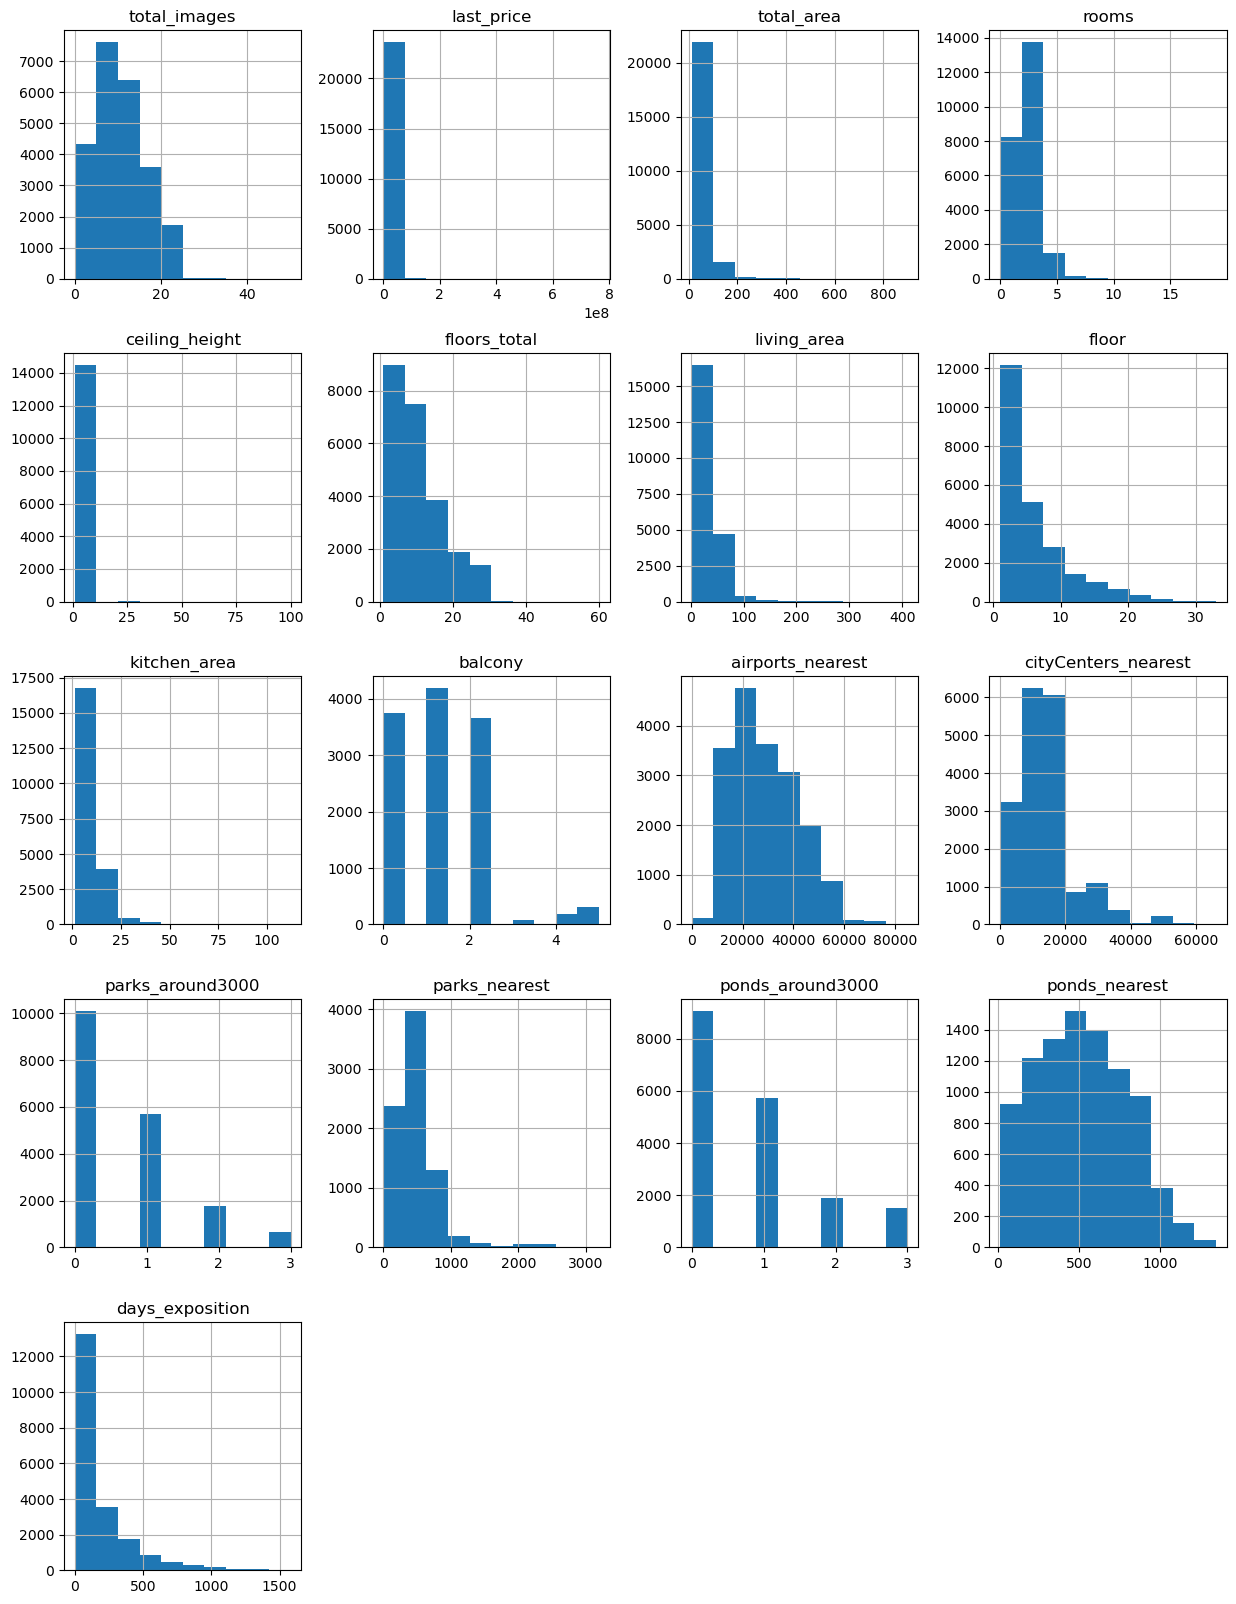

In [7]:
data.hist(figsize=(15, 20))
plt.show()

## Предобработка данных.

### Названия столбцов

*Поменяем названия некоторых столбцов.*

In [8]:
#поменяем названия на более удобное и стилистически правильное

data = data.rename(columns={'last_price' : 'price', 'cityCenters_nearest' : 'city_сenters_nearest'})

### Дубликаты

*Выведем количество дубликатов методом `duplicated()`.*

In [9]:
data.duplicated().sum()

0

### Пропуски

*Определим количество пропущенных значений методом `isna()`*

In [10]:
data.isna().sum()

total_images                0
price                       0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

*Посмотрим на количество пропусков в %*

In [11]:
pd.DataFrame(round(data.isna().mean()*100,2)).style.background_gradient('coolwarm')

,0
total_images,0.000000
price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.360000
living_area,8.030000
floor,0.000000
is_apartment,88.290000


*Более подробно изучим пропуски в столбцах `balcony`, `ceiling_height` и `is_apartment`*

**balcony**

In [12]:
#выведем уникальные значения столбца

data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [13]:
#и посмотрим на количество значений

data['balcony'].value_counts().sort_values(ascending=False).reset_index()

,index,balcony
0,1.0,4195
1,0.0,3758
2,2.0,3659
3,5.0,304
4,4.0,183
5,3.0,81


*Вероятно, если продавец не указал число балконов - их в квартире нет. Заменим значения `nan` на 0*

In [14]:
data['balcony'] = data['balcony'].fillna(0)

print('Количество пропусков в стобце balcony:', data['balcony'].isna().sum())

Количество пропусков в стобце balcony: 0


**ceiling_height**

In [15]:
#выведем уникальные значения столбца

data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

*Ранее методом `describe` мы выяснили, что медианное значение данного столбца - 2.65м, заменим пропущенные значения на медианное*

In [16]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

print('Количество пропусков в стобце ceiling_height:', data['ceiling_height'].isna().sum())

Количество пропусков в стобце ceiling_height: 0


**is_apartment**

In [17]:
#выведем уникальные значения столбца

data['is_apartment'].unique()

array([nan, False, True], dtype=object)

*Согласно открытым источникам информации, в Санкт-Петербурге апартаменты занимают относительно небольшую долю рынка - в районе 8%. Скорее всего, пропущенные значения означают, что жилой объект не является апартаментами. Заменим пропущенные значения на `false`*

In [18]:
data['is_apartment'] = data['is_apartment'].fillna(False)

print('Количество пропусков в стобце is_apartment:', data['is_apartment'].isna().sum())

Количество пропусков в стобце is_apartment: 0


*Можно предположить, что пропуски данных в столбцах, связанных с расстоянием до объектов и наличием объектов на определенном расстоянии, связаны с тем, что продавец не владеет точной информацией о расстояниях. Также нельзя исключать ошибки в данных. Трогать эти столбцы мы не будем. Для заполнения пропусков в столбцах с площадью информации не хватит. Остается 86 пропусков в столбце с количеством этажей и 49 пропусков в столбце населенного пункта - удалим строки с данными пропусками, т.к. в дальнейшем это может помешать исследованию, их количество мизерное.*

In [19]:
#удаляем пропуски

data = data.dropna(subset=['floors_total','locality_name']) 

In [20]:
#выведем таблицу после обработки

data.isna().sum()

total_images                0
price                       0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_сenters_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

### Типы данных

In [21]:
#еще раз посмотрим на типы данных

data.dtypes

total_images              int64
price                   float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_сenters_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

*столбец `first_day_exposition` имеет запись строки, столбец `floors_total` имеет дробный тип - отформатируем*

In [22]:
#примем формат даты и целое число

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int')

### Уникальные значения в столбце с населенными пунктами.

In [23]:
data['locality_name'].unique()

print('Количество значений в столбце с населенными пунктами:', len(data.locality_name.unique()))

Количество значений в столбце с населенными пунктами: 364


*Различные записи поселков.*

In [24]:
#приведем к одному порядку
#выведем количество уникальных значений

data = data.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 
                                       'посёлок городского типа': 'посёлок', 'коттеджный посёлок': 'посёлок', 
                                       'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))

print('Количество значений в столбце с населенными пунктами:', len(data.locality_name.unique()))

Количество значений в столбце с населенными пунктами: 333


*Преобразовали 31 неявный дубликат.*

### Аномальные значения

*Ранее мы видели в столбце `ceiling_height` однозначные выбросы 100,32,27м и т.д. Убедимся в этом - выведем датафрейм отсортированный по столбцу `ceiling_height` по убыванию и посмотрим на столбец `total_area`*. 

In [25]:
data.sort_values(by='ceiling_height', ascending=False).head(5) 

,total_images,price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,False,...,8.0,0.0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22336,19,9999000.0,92.4,2019-04-05,2,32.0,6,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
21377,19,4900000.0,42.0,2017-04-18,1,27.5,24,37.7,19,False,...,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,False,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0


*Навряд ли в квартирах общей площадью 45-90 квадратов высота потолков составляет 25-30 метров. Высота потолков меньше двух метров также маловероятна.*

In [26]:
#убираем значения меньше 2 и больше 10

data = data[(data['ceiling_height']>2)&(data['ceiling_height']<8)]

#### Удалим  значения выше 99 квантиля в столбцах `price`	, `total_area`, `rooms`, `floors_total`, `living_area`, `kitchen_area`.

In [27]:
data = data[data['price'] < data['price'].quantile(0.99)]
data = data[data['total_area'] < data['total_area'].quantile(0.99)]
data = data[data['rooms'] < data['rooms'].quantile(0.99)]
data = data[data['living_area'] < data['living_area'].quantile(0.99)]
data = data[data['kitchen_area'] < data['kitchen_area'].quantile(0.99)]

In [28]:
 #посмотрим на таблицу еще раз

data.describe()

,total_images,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,19806.000000,1.980600e+04,19806.000000,19806.000000,19806.000000,19806.000000,19806.000000,19806.000000,19806.000000,19806.000000,15212.000000,15230.000000,15231.000000,6565.000000,15231.000000,7364.000000,17200.000000
mean,10.007170,5.386901e+06,55.228680,1.977633,2.680800,10.694739,31.489405,5.875290,9.766078,0.625770,28910.286484,14678.218910,0.580527,493.883473,0.730943,526.319663,180.195872
std,5.595003,3.363803e+06,20.300882,0.876092,0.192254,6.555257,13.723039,4.847557,3.794778,0.966655,12867.887689,8585.351151,0.776416,339.799779,0.915806,276.962716,216.443199
min,0.000000,4.300000e+05,14.000000,1.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.440000e+06,40.000000,1.000000,2.600000,5.000000,18.500000,2.000000,7.000000,0.000000,18242.000000,10185.250000,0.000000,289.000000,0.000000,304.000000,44.000000
50%,10.000000,4.550000e+06,50.780000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,27089.000000,13355.000000,0.000000,458.000000,0.000000,511.000000,98.000000
75%,14.000000,6.350000e+06,66.000000,3.000000,2.700000,16.000000,40.900000,8.000000,11.200000,1.000000,37434.000000,16469.250000,1.000000,616.000000,1.000000,736.000000,231.000000
max,50.000000,3.510700e+07,166.600000,4.000000,4.800000,60.000000,79.700000,33.000000,29.900000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


*Удалив аномальные выбросы мы вероятно убрали часть супер элитного жилья из выборки и явные ошибки в данных. Однако максимальное количество балконов в квартирах по прежнему 5.*

In [29]:
#выведем уникальные значения столбца

data['balcony'].value_counts().reset_index()

,index,balcony
0,0.0,12282
1,1.0,3791
2,2.0,3264
3,5.0,259
4,4.0,150
5,3.0,60


In [30]:
#посмотрим на количество балконов в разрезе площади квартир

data.pivot_table(index='balcony', values='total_area').reset_index()

,balcony,total_area
0,0.0,55.476931
1,1.0,52.496112
2,2.0,54.937515
3,3.0,71.662833
4,4.0,71.470667
5,5.0,73.908803


*Смущает количество балконов равное 4 и 5 в жилых помещениях с квадратной площадью ≈ 75. Приравняем 5 балконов к 2, а 4 к 1.*

In [31]:
#заменим значения

data['balcony'] = data['balcony'].replace({5.0 : 2.0, 4.0 : 1.0})

### Новые столбцы

*Добавим в таблицу новые столбцы со следующими параметрами:*

- `sm_price` - цена одного квадратного метра;
- `day_of_the_week` - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- `month_exposition` - месяц публикации объявления;
- `year_exposition` - год публикации объявления;
- `floor_type` - тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- `city_centers_nearest_km` - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [32]:
#cчитаем цену за один квадратный мерт

data['sm_price'] = data['price'] / data['total_area']

In [33]:
#создаем столбец с днями недели, где 0 - понедельник, 1 - вторник и т.д.

data['day_of_the_week'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [34]:
#создаем столбец с месяцем публикации

data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [35]:
#аналогично с годом

data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [36]:
def floor_type(row):
    """

    функция для определения типа этажа квартиры

    """
    if row['floor'] == 1:
        return 1
    elif row['floor'] == row['floors_total']:
        return 2
    else:
        return 0 

In [37]:
#применим функцию

data['floor_type'] = data.apply(floor_type, axis=1)

In [38]:
#переводим километры в метры и округляем

data['city_centers_nearest_km'] = round(data['city_сenters_nearest'] / 1000) #переводим километры в метры

In [39]:
#посмотрим на новую таблицу

data.head()

,total_images,price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sm_price,day_of_the_week,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,0,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,1,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,0,14.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,0,NaN
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,0,19.0


**Вывод**: 
- мы провели небольшую предобработку данных, а именно:
     * заменили названия, привели к стилистически правильному и более удобному обозначению;
     * провели проверку на наличие явных дубликатов;
     * нашли пропуски и их процентное соотношение:
         * заменили пропуски в столбцах `balcony`, `ceiling_height` и `is_apartment`.
     * изменили тип данных столбцов `first_day_exposition` и`floors_total`;
     * привели к единому формату некоторые названия населенных пунктов, преобразовав 31 неявный дубликат;
     * удалили аномальные значения, либо явные ошибки в данных;
     * добавили новые столбцы - `sm_price`, `day_of_the_week`, `month_exposition`, `year_exposition`, `floor_type`, `city_centers_nearest_km`

## Исследовательский анализ данных.


### Изучим следующие параметры объектов:

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

*Для этого построим гистограммы.*

**Общая площадь**

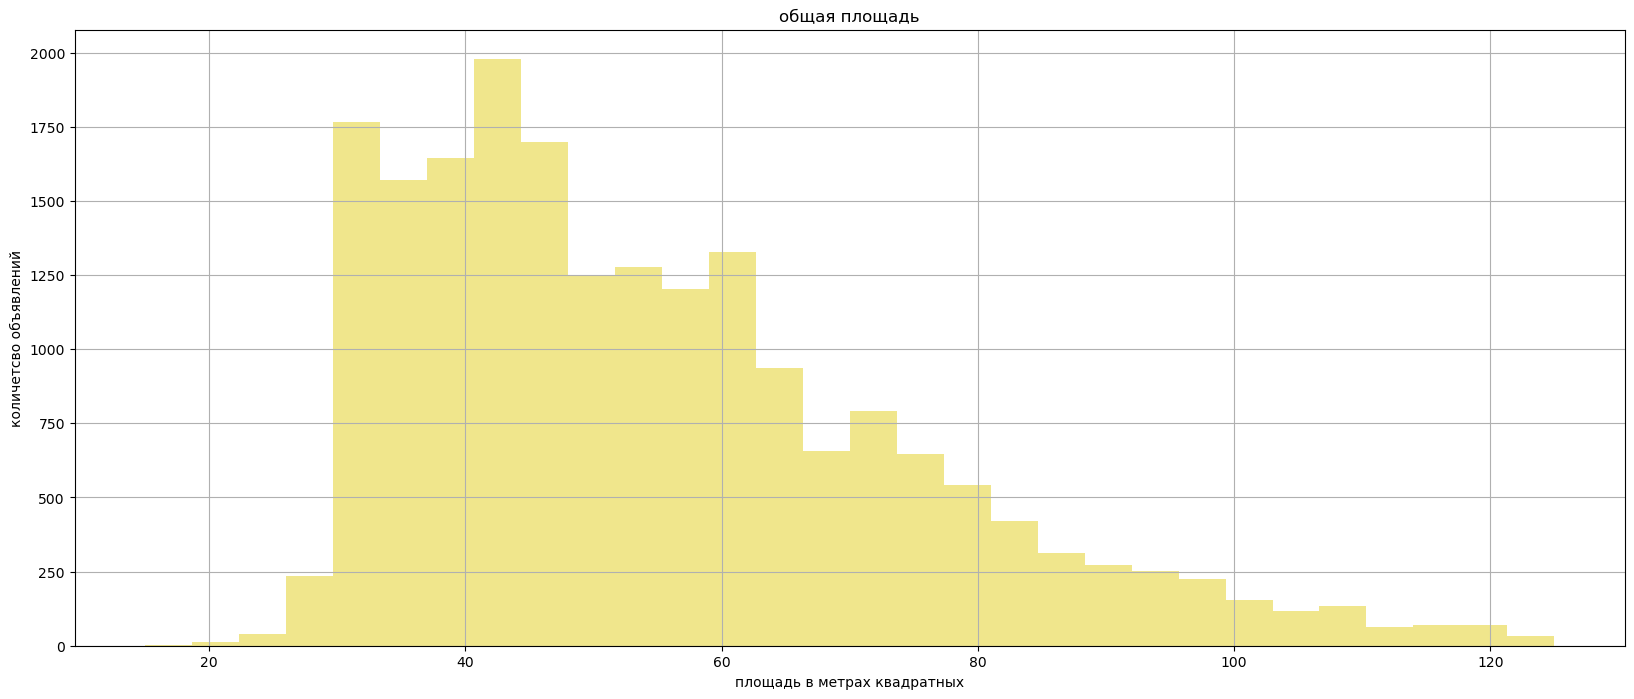

In [40]:
#строим гистограмму по параметрам общей площади

data.hist(column='total_area',bins=30, figsize=(20,8), range=(15, 125), color='khaki')
plt.title('общая площадь')
plt.xlabel('площадь в метрах квадратных')
plt.ylabel('количетсво объявлений')
plt.show()

*Пик приходится на 30-60 м2, что говорит о том, что в данных представлено обычное жилье эконом/комфорт класса*

**Жилая площадь**

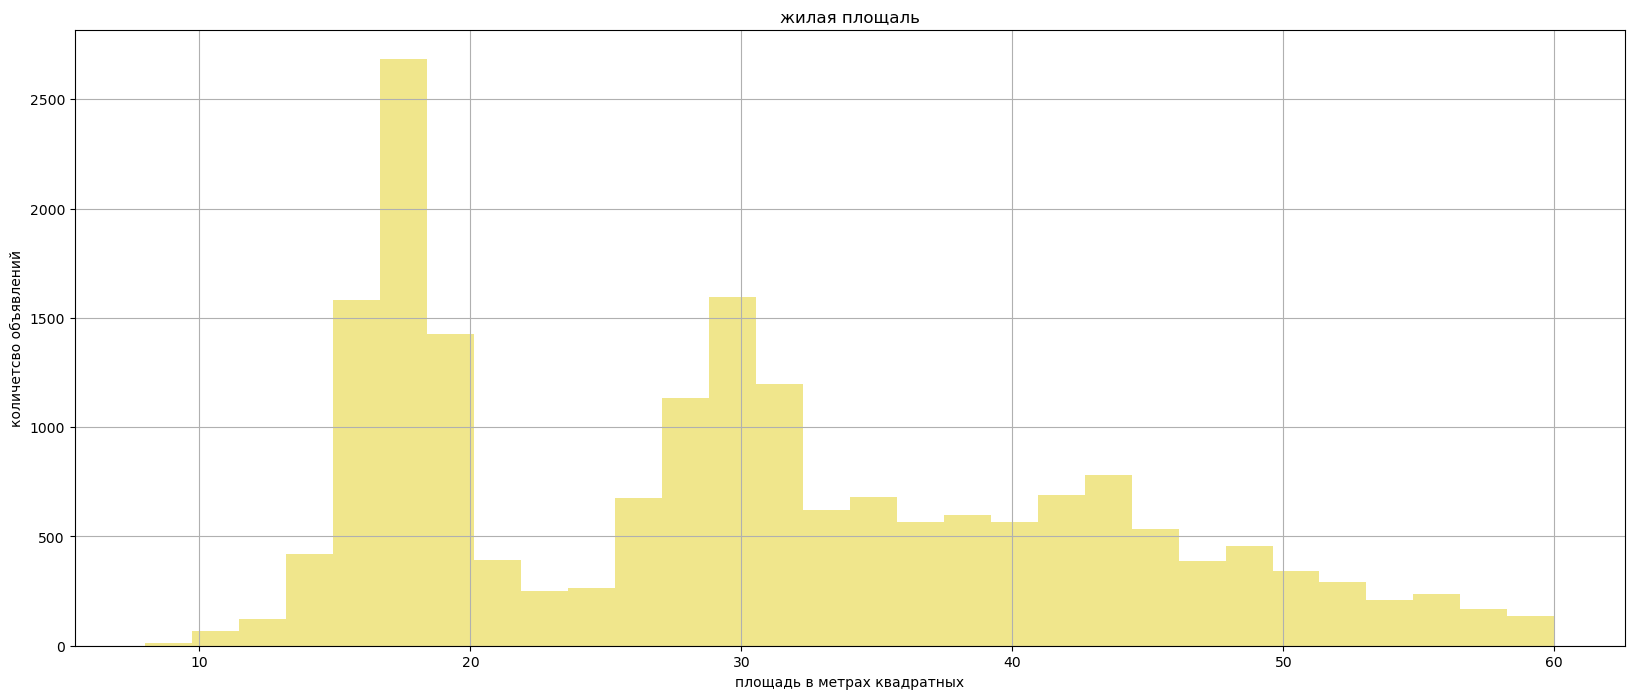

In [41]:
#строим гистограмму по параметрам жилой площади

data.hist(column='living_area',bins=30, figsize=(20,8), range=(8,60), color='khaki')
plt.title('жилая площаль')
plt.xlabel('площадь в метрах квадратных')
plt.ylabel('количетсво объявлений')
plt.show()

*Видно несколько пиков в районе 18 и 30 кв. метров. Этот показатель однозначно привязан к количеству комнат*

**Площадь кухни**

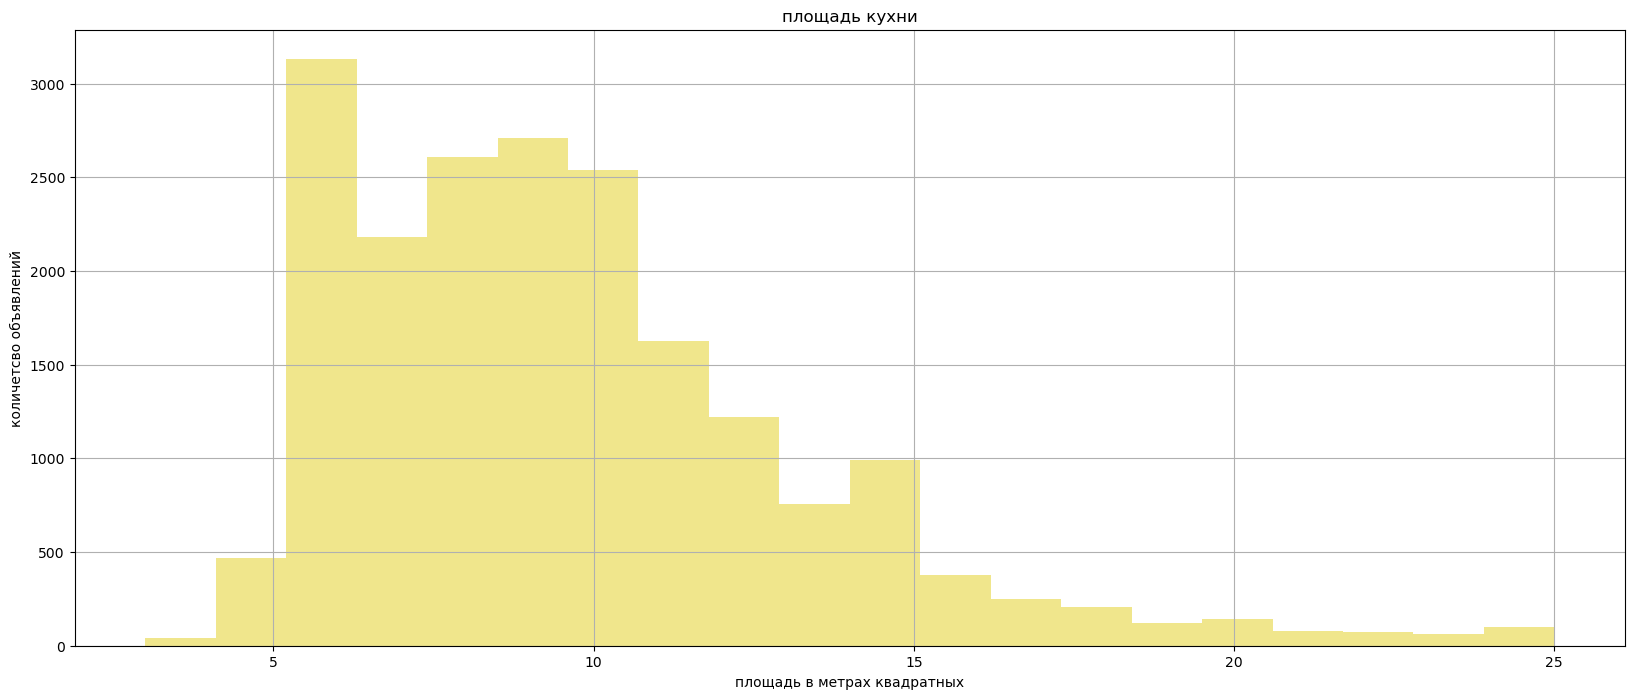

In [42]:
#строим гистограмму по параметрам площади кухни

data.hist(column='kitchen_area', bins=20, figsize=(20,8), range=(3,25), color='khaki')
plt.title('площадь кухни')
plt.xlabel('площадь в метрах квадратных')
plt.ylabel('количетсво объявлений')
plt.show()

*В основном площадь кухни варьируется от 5 до 11 м2*

**Цена**

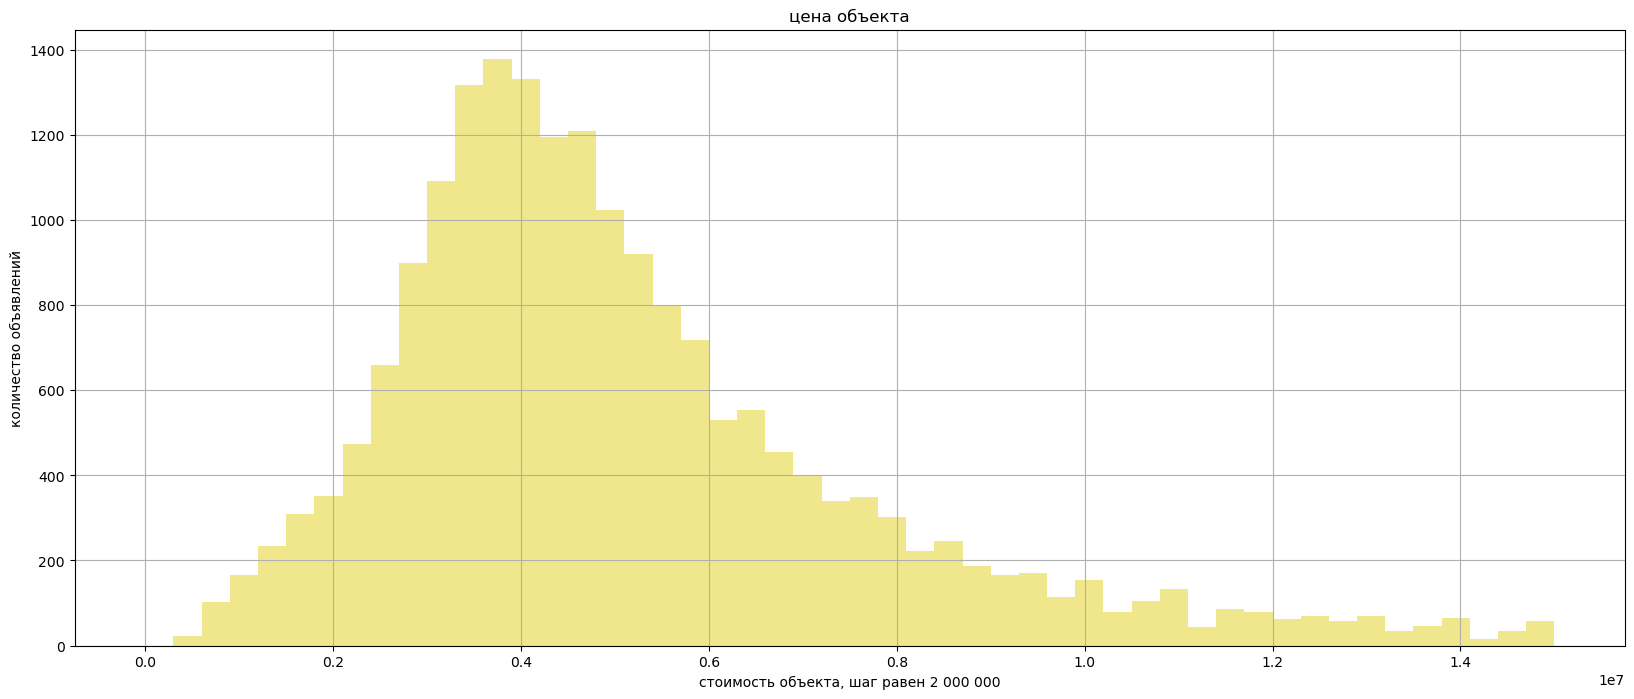

In [43]:
#строим гистограмму по параметрам цены объекта

data.hist(column='price',bins=50, figsize=(20,8), range=(0, 15000000), color='khaki')
plt.title('цена объекта')
plt.xlabel('стоимость объекта, шаг равен 2 000 000')
plt.ylabel('количество объявлений')
plt.show()

*Стоимость объектов в основном варьируется от 2,5 до 6 млн. Пик цен из объявлений приходится ≈ на 4 млн.*

**Количество комнат**

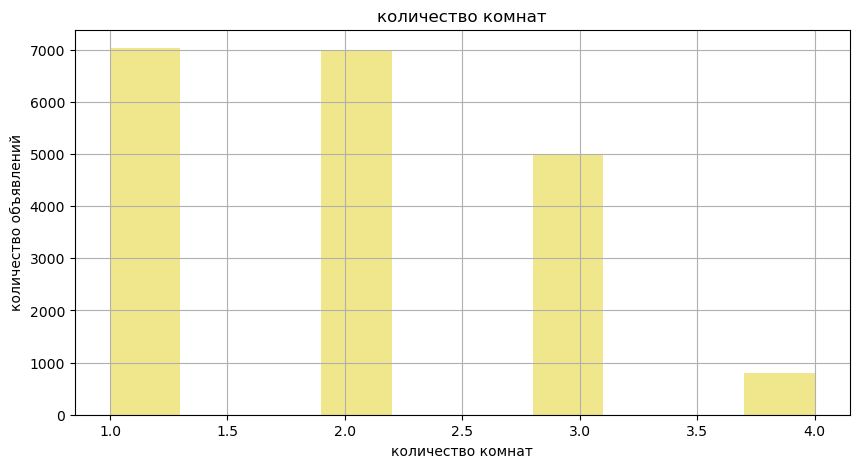

In [44]:
#строим гистограмму по параметрам количества комнат

data.hist(column='rooms',bins=10, figsize=(10,5), color='khaki')
plt.title('количество комнат')
plt.xlabel('количество комнат')
plt.ylabel('количество объявлений')
plt.show()

*Количество однокомнатных квартир в объявлениях практически совпадает с количество двухкомнатных*

**Высота потолков**

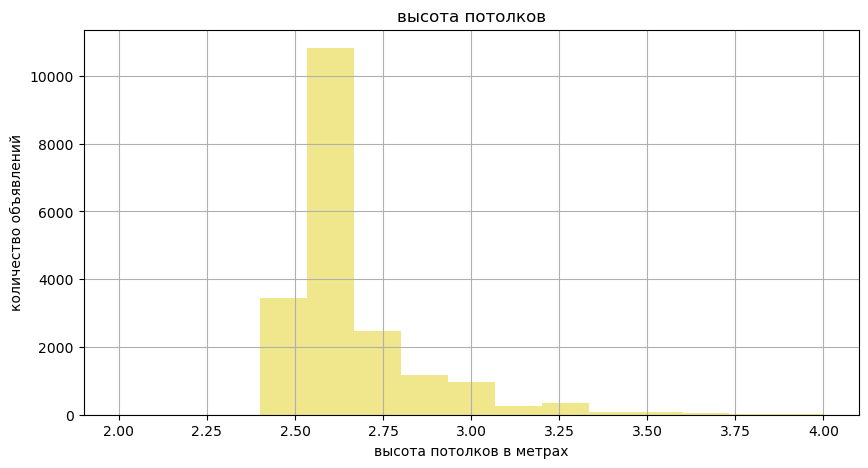

In [45]:
#строим гистограмму по параметрам высоты потолков

data.hist(column='ceiling_height', bins=15, figsize=(10,5), range=(2,4), color='khaki')
plt.title('высота потолков')
plt.xlabel('высота потолков в метрах')
plt.ylabel('количество объявлений')
plt.show()

*Пик приходится на 2,6м. Нормальные значения*

**Этаж**

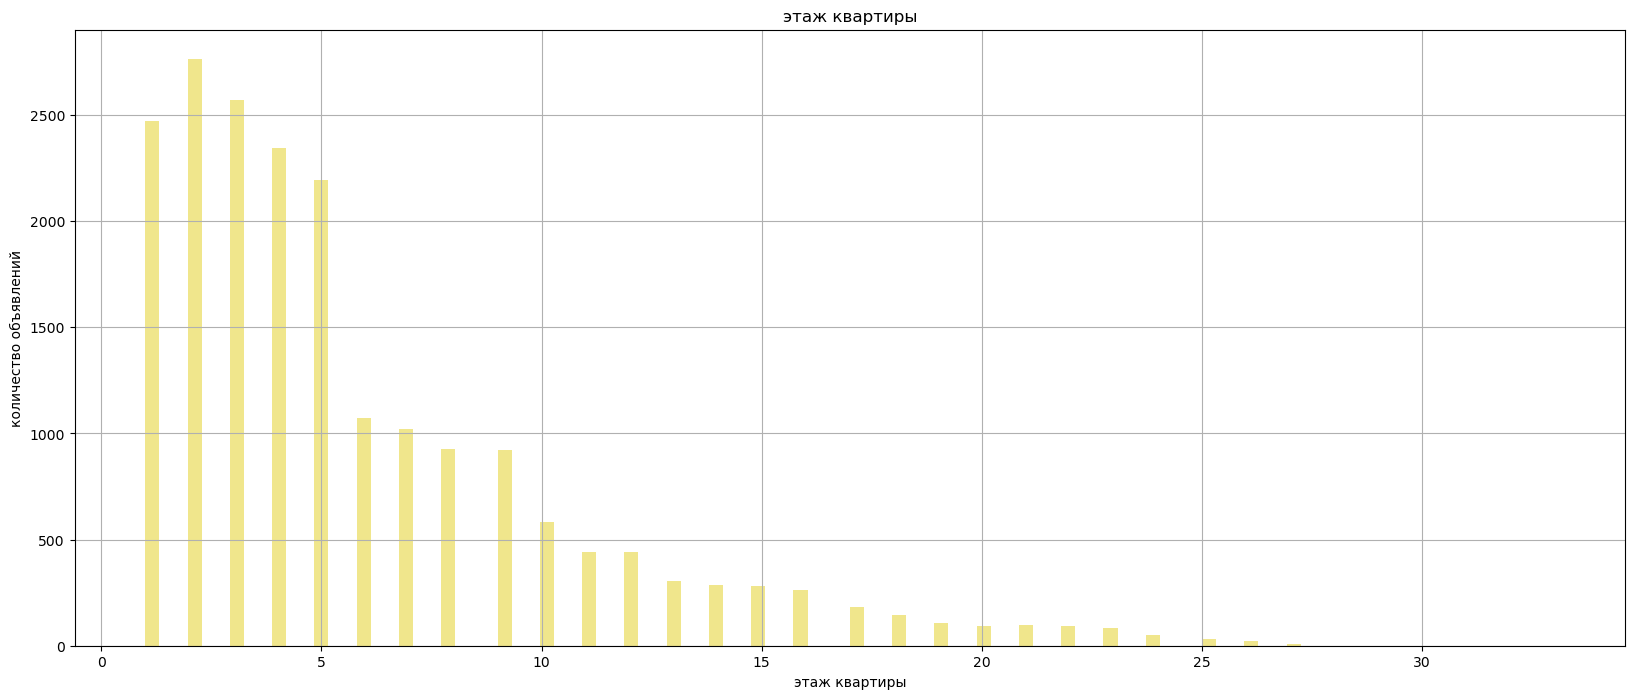

In [46]:
#строим гистограмму по параметрам этажей квартиры

data.hist(column='floor', bins=100, figsize=(20,8), color='khaki')
plt.title('этаж квартиры')
plt.xlabel('этаж квартиры')
plt.ylabel('количество объявлений')
plt.show()

*Можно сделать вывод, что в данных в основном представлены квартиры в пятиэтажных домах*

**Тип этажа**

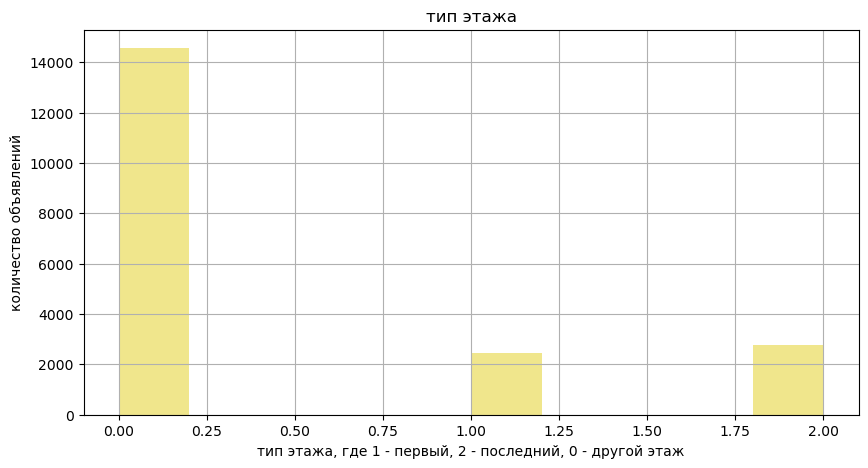

In [47]:
#строим гистограмму по параметрам типа этажей

data['floor_type'].hist(bins=10, figsize=(10,5), color='khaki')
plt.title('тип этажа')
plt.xlabel('тип этажа, где 1 - первый, 2 - последний, 0 - другой этаж')
plt.ylabel('количество объявлений')
plt.show()

*Количество первых этажей практически совпадает с количеством последних*

**Количество комнат**

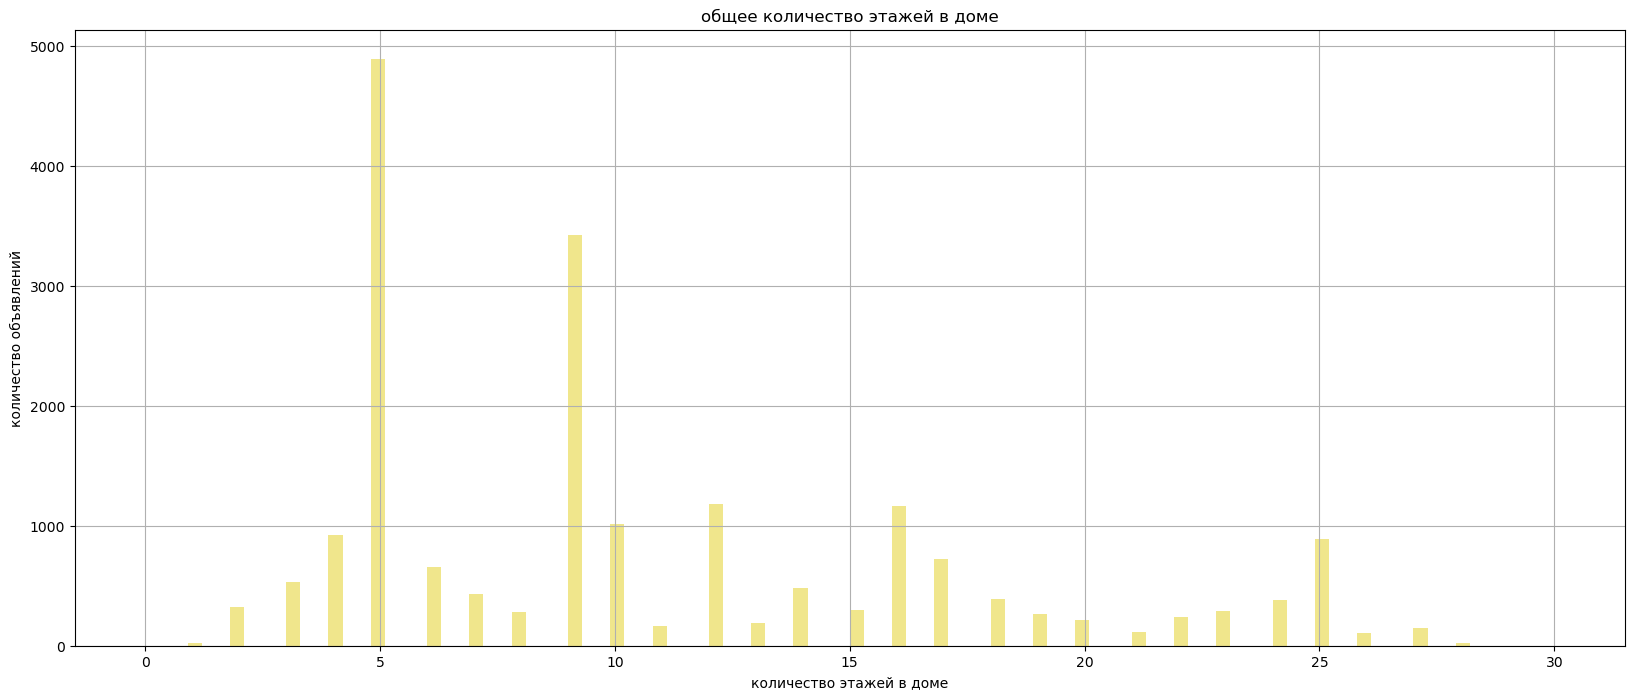

In [48]:
#строим гистограмму по параметрам общего количества этажей

data.hist(column='floors_total', bins=100, figsize=(20,8), range=(0,30), color='khaki') 
plt.title('общее количество этажей в доме')
plt.xlabel('количество этажей в доме')
plt.ylabel('количество объявлений')
plt.show()

*Как и предполагалось ранее, в основном в объявлениях представлены пятиэтажные дома. Выделяются также девятиэтажки*

**Расстояние до центра города**

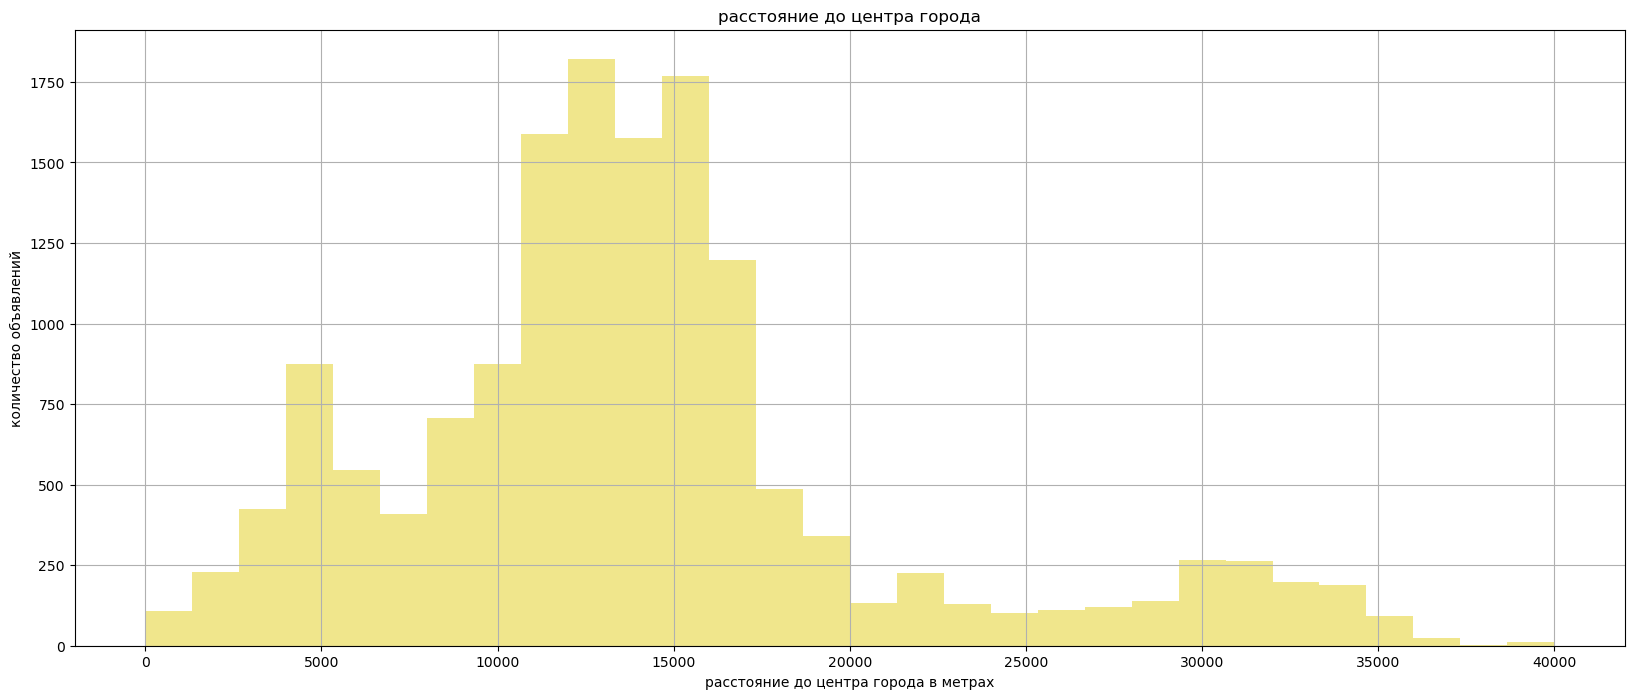

In [49]:
#строим гистограмму по параметрам расстояния до центра города

data.hist(column='city_сenters_nearest', bins=30, figsize=(20,8), range=(0,40000), color='khaki') 
plt.title('расстояние до центра города')
plt.xlabel('расстояние до центра города в метрах')
plt.ylabel('количество объявлений')
plt.show()

*Большая часть объектов находится на окраинах Санкт-Петербурга или в области*

**Расстояние до аэропорта**

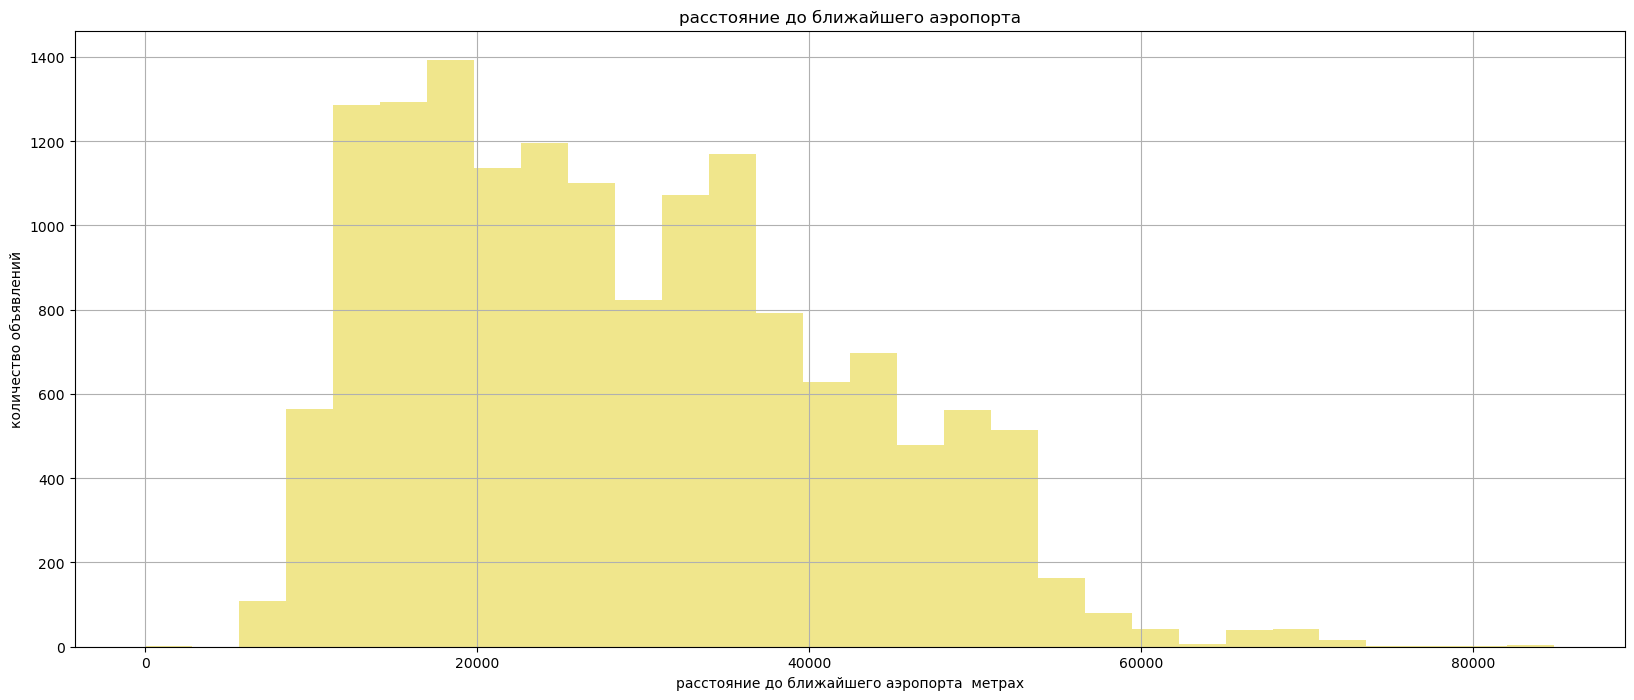

In [50]:
#строим гистограмму по параметрам расстояния до аэропорта

data.hist(column='airports_nearest', bins=30, figsize=(20,8), color='khaki') 
plt.title('расстояние до ближайшего аэропорта')
plt.xlabel('расстояние до ближайшего аэропорта  метрах')
plt.ylabel('количество объявлений')
plt.show()

*Возможно, большая часть объектов расположена также севернее или восточнее города, судя по расстоянию до аэропорта, т.к. аэропорт находится на юге*

**Расстояние до ближайшего парка**

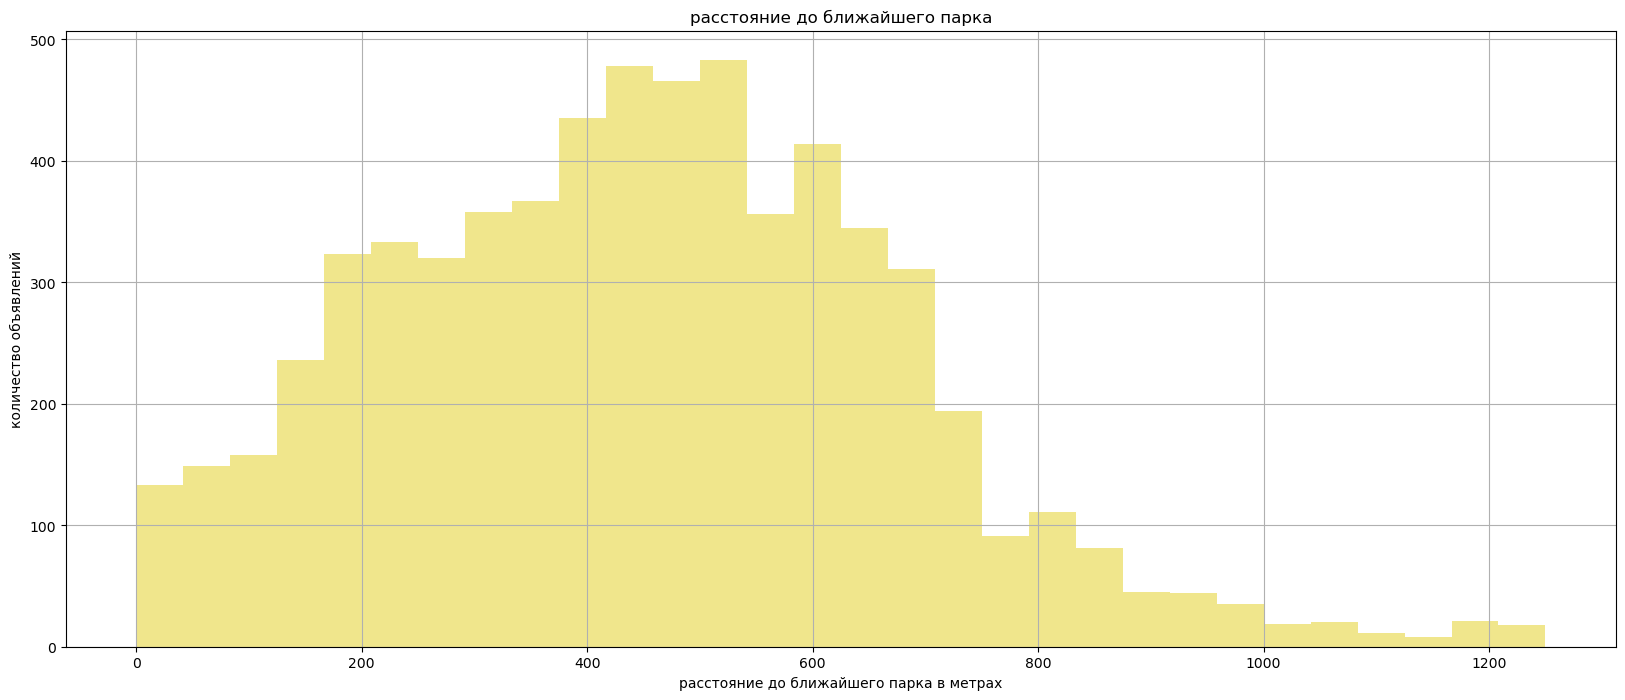

In [51]:
#строим гистограмму по параметрам расст. до ближ. парка

data['parks_nearest'].hist(bins=30, figsize=(20,8), range=(0, 1250), color='khaki')
plt.title('расстояние до ближайшего парка')
plt.xlabel('расстояние до ближайшего парка в метрах')
plt.ylabel('количество объявлений')
plt.show()

*Всюду парки - это замечательно*

**День и месяц публикации**

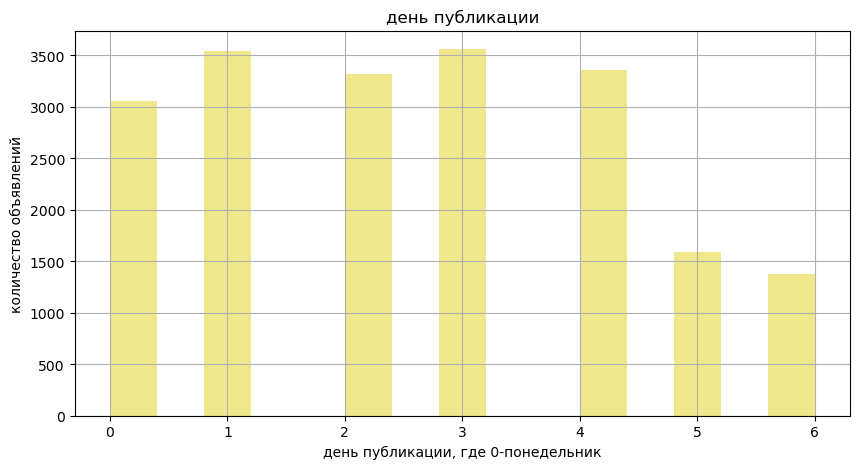

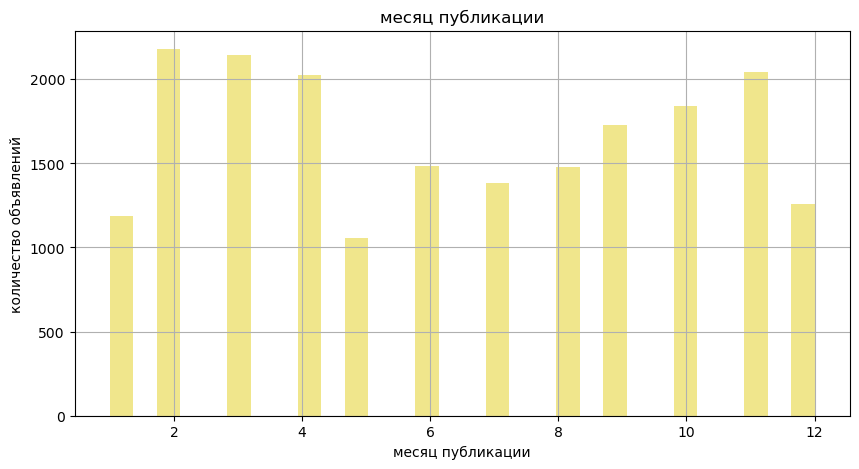

In [52]:
#строим гистограммы по параметрам дня и месяца публикации

data['day_of_the_week'].hist(bins=15, figsize=(10,5), color='khaki')
plt.title('день публикации')
plt.xlabel('день публикации, где 0-понедельник')
plt.ylabel('количество объявлений')
plt.show()
data['month_exposition'].hist(bins=30, figsize=(10,5), color='khaki')
plt.title('месяц публикации')
plt.xlabel('месяц публикации')
plt.ylabel('количество объявлений')
plt.show()

*Публикуются объявления о продаже чаще в рабочие дни. В начале года и по конец, летом объявлений меньше - период отпусков*

**Промежуточный вывод:**

1. Выделяется часть объявлений с параметрами:
- общей площади - 30-45 м2
- жилой площади - 16-18 м2
- площадью кухни - 5-11 м2
- стоимостью от 2,5 до 6 млн. руб.
- количеством комнат 1-2

*Что говорит нам о том, что основную часть объявлений составляет жилье эконом/комфорт класса*

2. Большая часть объектов находится на окраинах Санкт-Петербурга или в области, возможно севернее или восточнее города, судя по расстоянию до аэропорта, т.к. аэропорт находится на юге
3. Публикуются объявления о продаже чаще в рабочие дни. В начале года и по конец, летом объявлений меньше - период отпусков

### Продажа квартир

*Посмотрим, как быстро продавались квартиры, если мы учитываем, что день снятия объявления обозначает день продажи квартиры.*

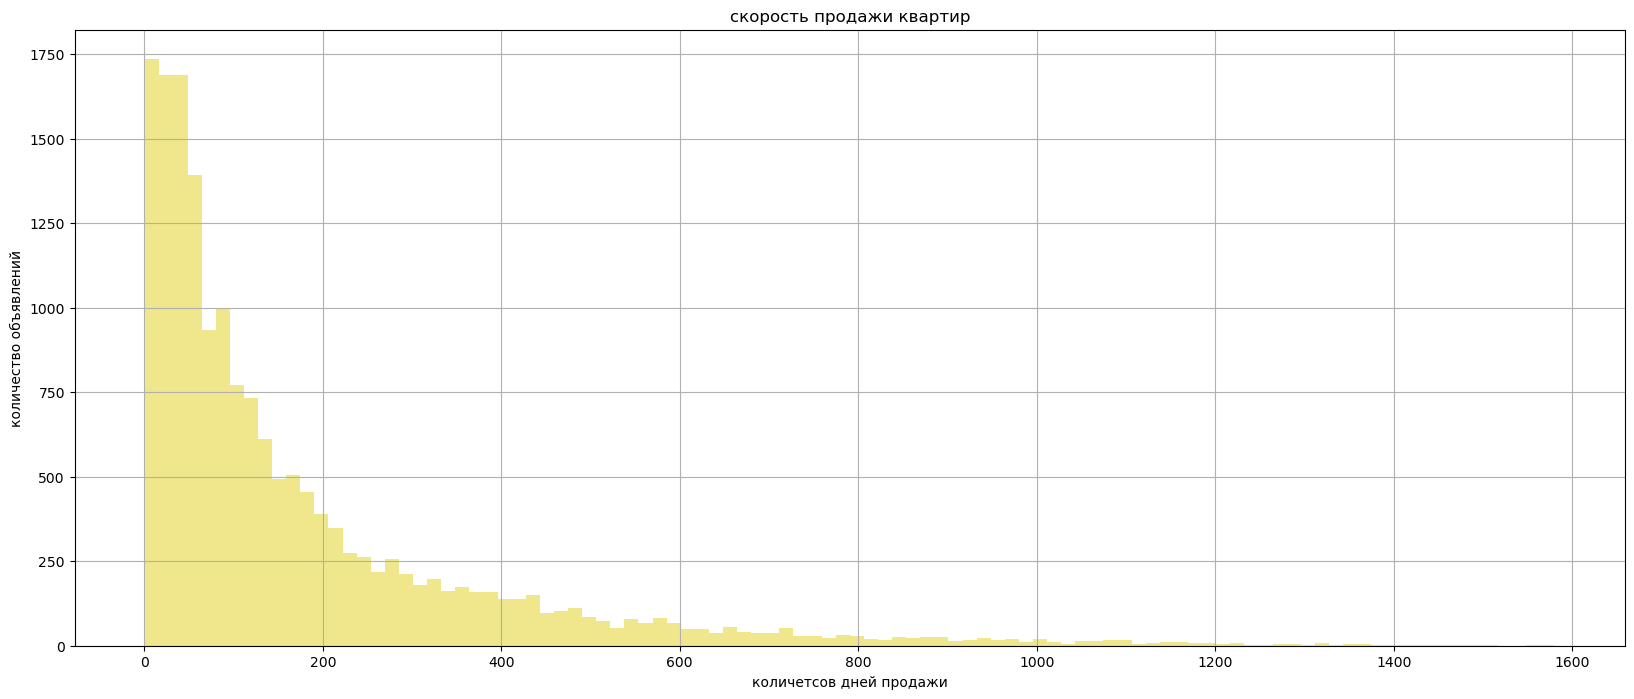

In [53]:
#строим гистограмму продажи кватир

data.hist(column='days_exposition', bins=100, figsize=(20,8), color='khaki')
plt.title('скорость продажи квартир')
plt.xlabel('количетсов дней продажи')
plt.ylabel('количество объявлений')
plt.show()          

*Мы видим много значений в районе 0, что кажется не правдоподобным, построим гистограмму размаха*

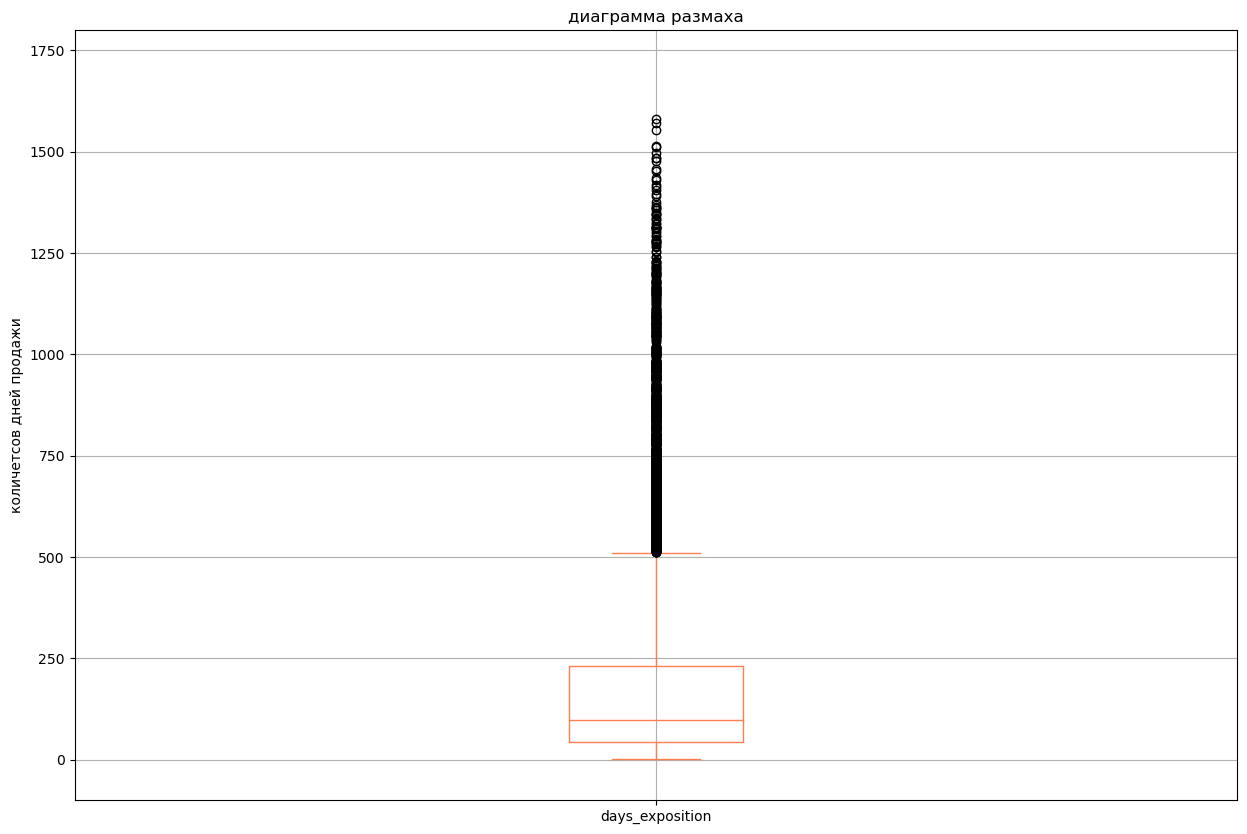

count    17200.000000
mean       180.195872
std        216.443199
min          1.000000
25%         44.000000
50%         98.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [54]:
#построим диаграмму размаха

data.boxplot(column='days_exposition', figsize=(15,10), color='coral')
plt.ylim(-100,1800)
plt.title('диаграмма размаха')
plt.ylabel('количетсов дней продажи')
plt.show()

display(data['days_exposition'].describe())

*Среднее значение во внимание не берем, т.к. оно искажено выбросами. К быстрым продажам можно отнести продажи до 44 дней, к средним от 45 до 100 дней. Все что позже можно отнести к длительным продажам.*

*Т.к. мы видели много значений в районе 0, выведем гистограмму, ограничив область до 100 дней и посмотрим более подробно*

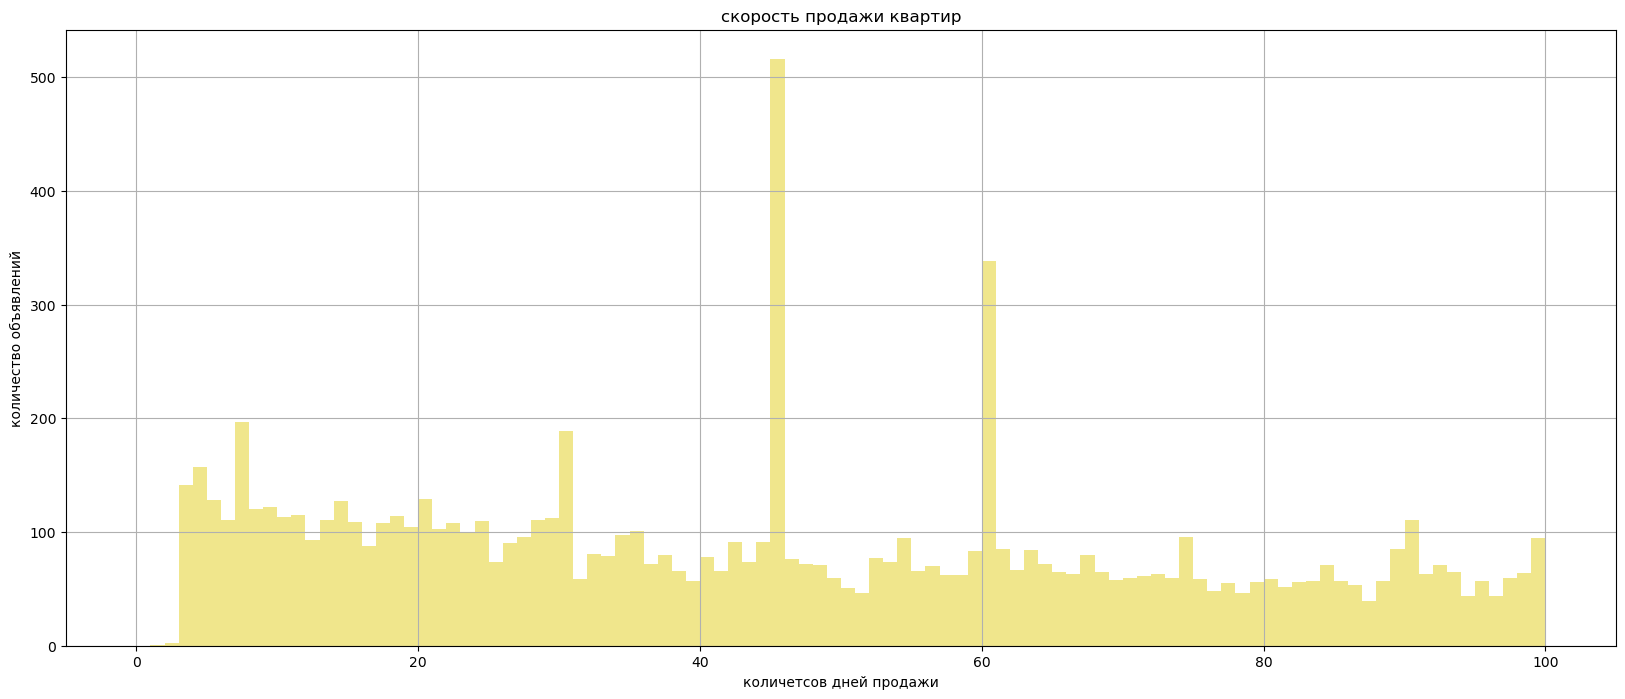

In [55]:
data.hist(column='days_exposition', bins=100, figsize=(20,8), range=(0, 100), color='khaki')
plt.title('скорость продажи квартир')
plt.xlabel('количетсов дней продажи')
plt.ylabel('количество объявлений')
plt.show()        

*Теперь мы видим, что пик продаж приходится на 45 и 60. Полагаю, это может быть связано с условиями размещения объявления. В Условиях размещения на сайте Яндекс недвижимость нашел информацию, что бесплатное объявление о продаже может находиться лишь определенный срок, сейчас это 120 дней. Возможно ранее были другие условия бесплатного размещения. Если это так, то мы можем сделать вывод, что снятие объявления с продажи далеко не означает продажу самого объекта.*

### Факторы больше всего влияющие на общую стоимость объекта.

Изучим, зависит ли цена от:

- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

In [56]:
#уберем из стоимости лишние нули, чтобы зависимость на графиках была более наглядной

data['price_mil'] = data['price'] / 1000000

In [57]:
#создадим функцию

def show(a,b,c,d):
    """
    функция для визуализации факторов
    
    """
    data.plot.scatter(x=a, y=b, figsize=(10,5), alpha=0.5, ylim=(0,30), color='lime')
    plt.title(c)
    plt.xlabel(d)
    plt.ylabel('стоимость')
    plt.show()

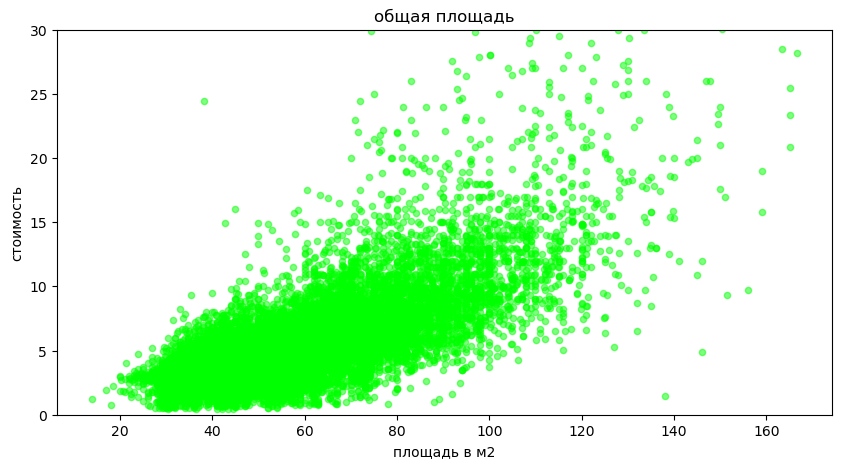

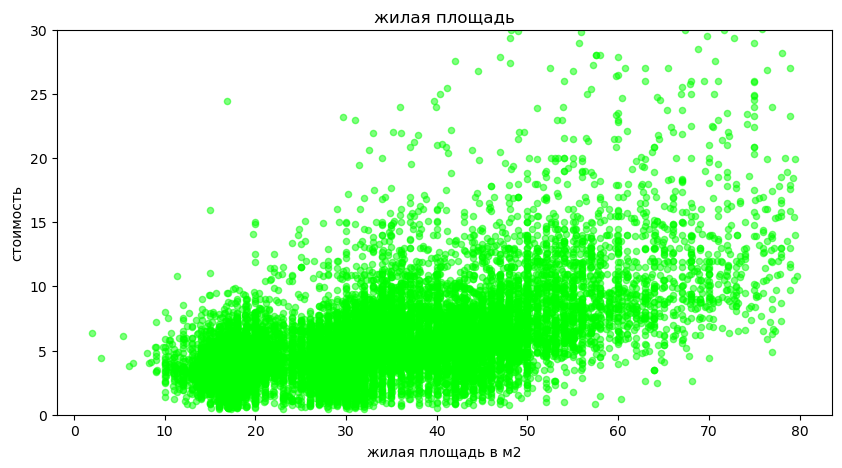

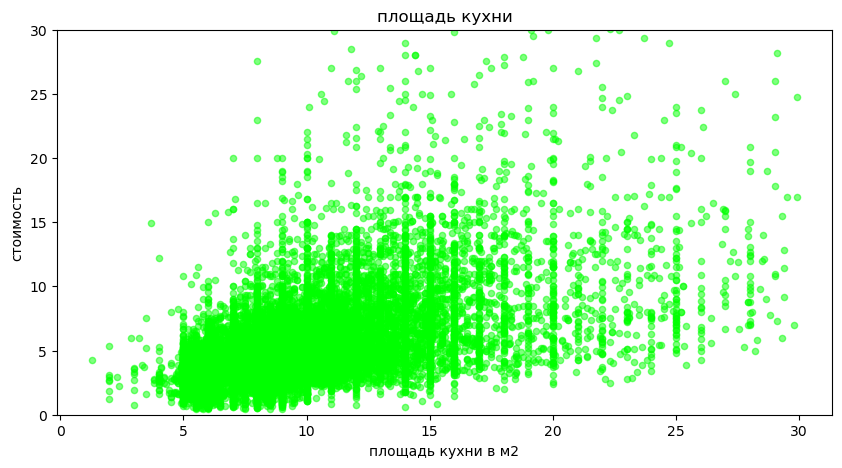

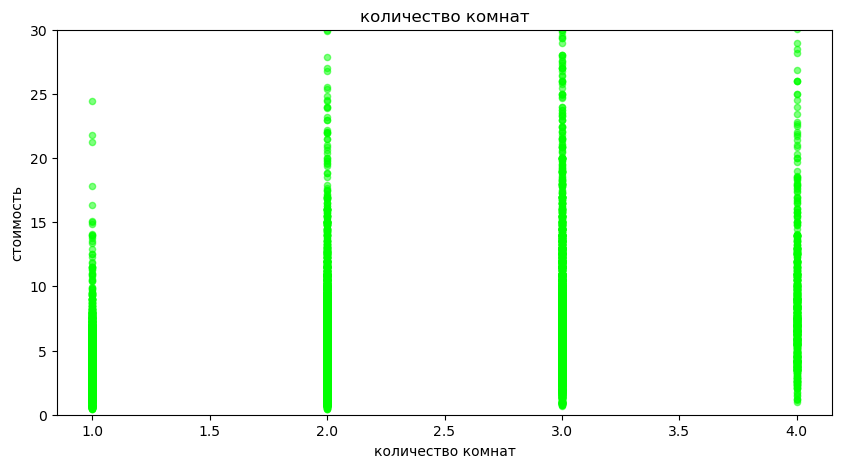

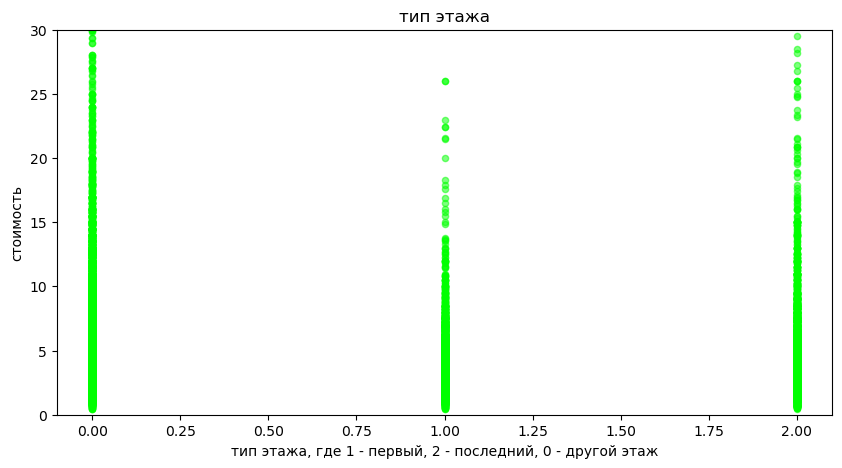

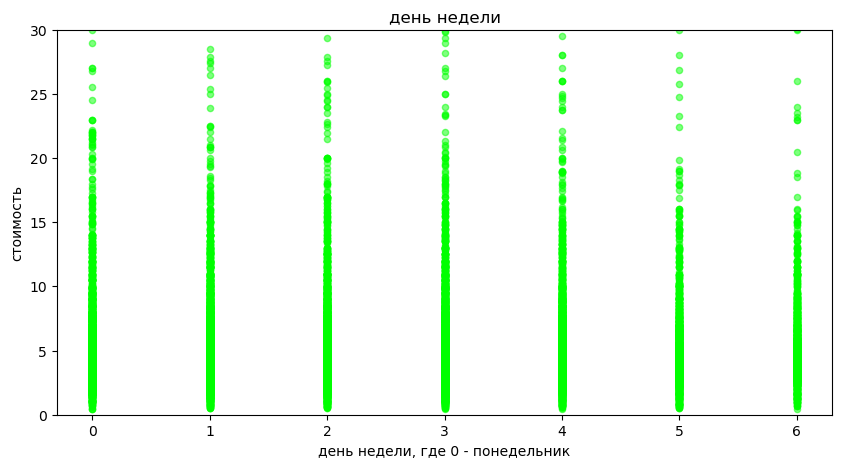

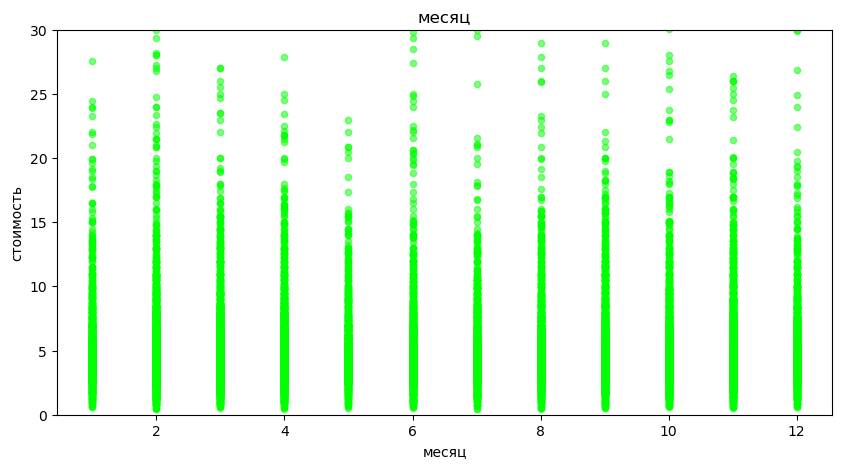

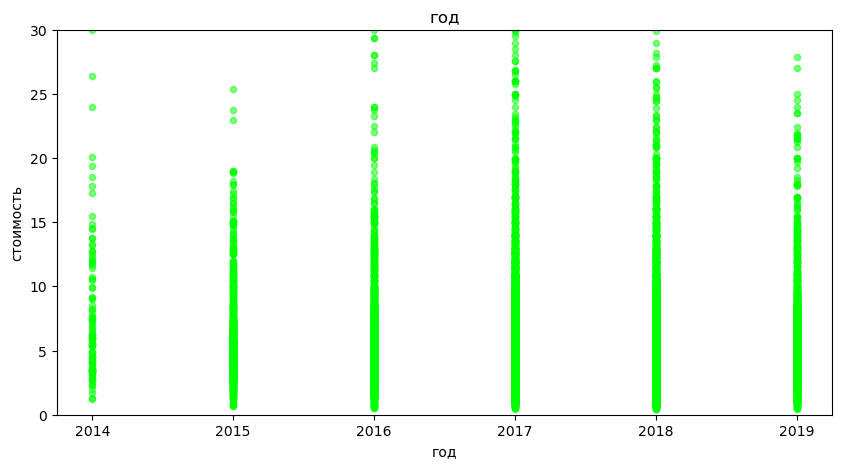

In [58]:
show('total_area', 'price_mil', 'общая площадь', 'площадь в м2')
show('living_area', 'price_mil', 'жилая площадь', 'жилая площадь в м2')
show('kitchen_area', 'price_mil', 'площадь кухни', 'площадь кухни в м2')
show('rooms', 'price_mil', 'количество комнат', 'количество комнат')
show('floor_type', 'price_mil', 'тип этажа', 'тип этажа, где 1 - первый, 2 - последний, 0 - другой этаж')
show('day_of_the_week', 'price_mil', 'день недели', 'день недели, где 0 - понедельник')
show('month_exposition', 'price_mil', 'месяц', 'месяц')
show('year_exposition', 'price_mil', 'год', 'год')

*Посмотрим влияние тех или иных параметров на стоимость объекта. Для этого посмотрим на параметр корреляции в разрезе столбца стоимости*

In [59]:
#оставим только необходимые столбцы

data_corr = data[{'total_area', 'living_area', 'kitchen_area', 'kitchen_area', 'rooms', 'floor_type', 'day_of_the_week',
                'month_exposition', 'year_exposition','price_mil'}]

C:\Users\user\AppData\Local\Temp\ipykernel_11708\140337414.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data_corr = data[{'total_area', 'living_area', 'kitchen_area', 'kitchen_area', 'rooms', 'floor_type', 'day_of_the_week',


interval columns not set, guessing: ['month_exposition', 'rooms', 'floor_type', 'living_area', 'price_mil', 'total_area', 'kitchen_area', 'year_exposition', 'day_of_the_week']


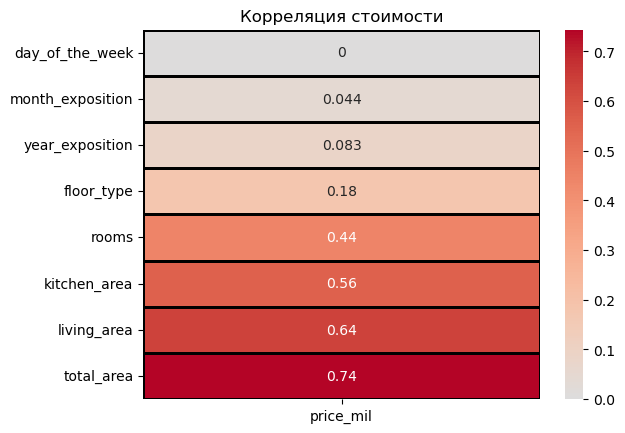

In [60]:
ax = sns.heatmap(data_corr.phik_matrix().loc[:,['price_mil']].drop('price_mil').sort_values('price_mil'),
            annot=True,cmap='coolwarm',center=0, linewidths=1, linecolor='black')
ax.set(title = "Корреляция стоимости")
plt.show()

**Вывод:** мы видим очевидные параметры, наиболее влияющие на цену, площадь и количество комнат. Также отметим, что квартиры на первых этажах наиболее дешевые, чуть меньшим спросом пользуются квартиры, расположенные на последних этажах.

Наименее значимыми параметрами являются год, месяц и день публикации. По гистограмме можно сказать, что пик стоимости приходится на 2017-2018 года. Однако не стоит забывать, что в `price_mil` хранится общая стоимость из объявлений. В нашем случае на графике в разрезе лет.


In [61]:
#посмотрим на количество объявлений по годам

data.groupby('year_exposition')['price'].agg(count=('count')).reset_index()

,year_exposition,count
0,2014,103
1,2015,935
2,2016,2355
3,2017,7016
4,2018,6955
5,2019,2442


In [62]:
#и на медианную стоимость по годам

data.groupby('year_exposition')['price_mil'].median().reset_index()

,year_exposition,price_mil
0,2014,6.200000
1,2015,4.950000
2,2016,4.398307
3,2017,4.434242
4,2018,4.550000
5,2019,4.950000


*Теперь ясно видно, что на 2017 и 2018 года просто пришлось гораздо большее количество объявлений. Однако стоимость объектов в 2014 году выше.*

*Ранее мы выяснили, что основным параметром, влияющим на стоимость, является площадь. Теперь посмотрим, менялась ли площадь помещений в разрезе лет.*

In [63]:
#размер общей площади по годам

data.groupby('year_exposition')['total_area'].median().reset_index()

,year_exposition,total_area
0,2014,69.0
1,2015,56.8
2,2016,52.0
3,2017,50.4
4,2018,50.0
5,2019,50.6


*Теперь ясно, с чем связан пик - стоимость. Повлиять на размеры площади вполне могли новостройки. Застройщикам выгоднее строить дома с большим количеством квартир, ведь выгоднее продать две однушки по 30 квадратов, чем одну двушку в 60. Застраивается все и вся, с каждым годом все стремительнее.*

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

*Выделим 10 населенных пунктов с наибольшим числом объявлений*

In [64]:
#создадим сводную таблицу с медианой

price_location = data.pivot_table(index='locality_name', values='sm_price', aggfunc=['count', 'median']) 
price_location.columns = ['count', 'median']
price_location.sort_values(by='count', ascending=False).reset_index().head(10)

,locality_name,count,median
0,Санкт-Петербург,13045,103448.275862
1,посёлок Мурино,426,85145.665323
2,посёлок Шушары,388,77312.834225
3,Всеволожск,353,65789.473684
4,Колпино,319,74725.274725
5,Пушкин,317,99650.349650
6,посёлок Парголово,288,92271.978022
7,Гатчина,288,67746.286082
8,деревня Кудрово,225,91860.465116
9,Петергоф,185,81944.444444


In [65]:
#найдем населенный пункт с мин. стоимостью


price_location[price_location['median'] == price_location['median'].min()].drop('count', axis=1).reset_index()

,locality_name,median
0,деревня Старополье,10368.663594


In [66]:
#и максимальной

price_location[price_location['median'] == price_location['median'].max()].drop('count', axis=1).reset_index()

,locality_name,median
0,Санкт-Петербург,103448.275862


**Вывод:** Самым популярным среди объявлений с большим отрывом оказался Санкт-Петербург. 

Наименьшая стоимость за м2 в деревне Старополье.

Наибольшая в Санкт-Петербурге.

### Средняя стоимость каждого км от центра Санкт-Петербурга

In [67]:
#сделаем срез по населенному пункту

snt_pet = data[data['locality_name'] == 'Санкт-Петербург'] 

#образуем сводную таблицу 

snt_pet_price = (
    snt_pet
    .pivot_table(index='city_centers_nearest_km', values=['sm_price','price_mil'])
    .reset_index()
    .sort_values(by='city_centers_nearest_km')
)

snt_pet_price.head(5)

,city_centers_nearest_km,price_mil,sm_price
0,0.0,13.142966,169019.798679
1,1.0,10.497750,135986.562806
2,2.0,9.828140,131327.267625
3,3.0,8.341008,116168.630199
4,4.0,9.100875,126312.453515


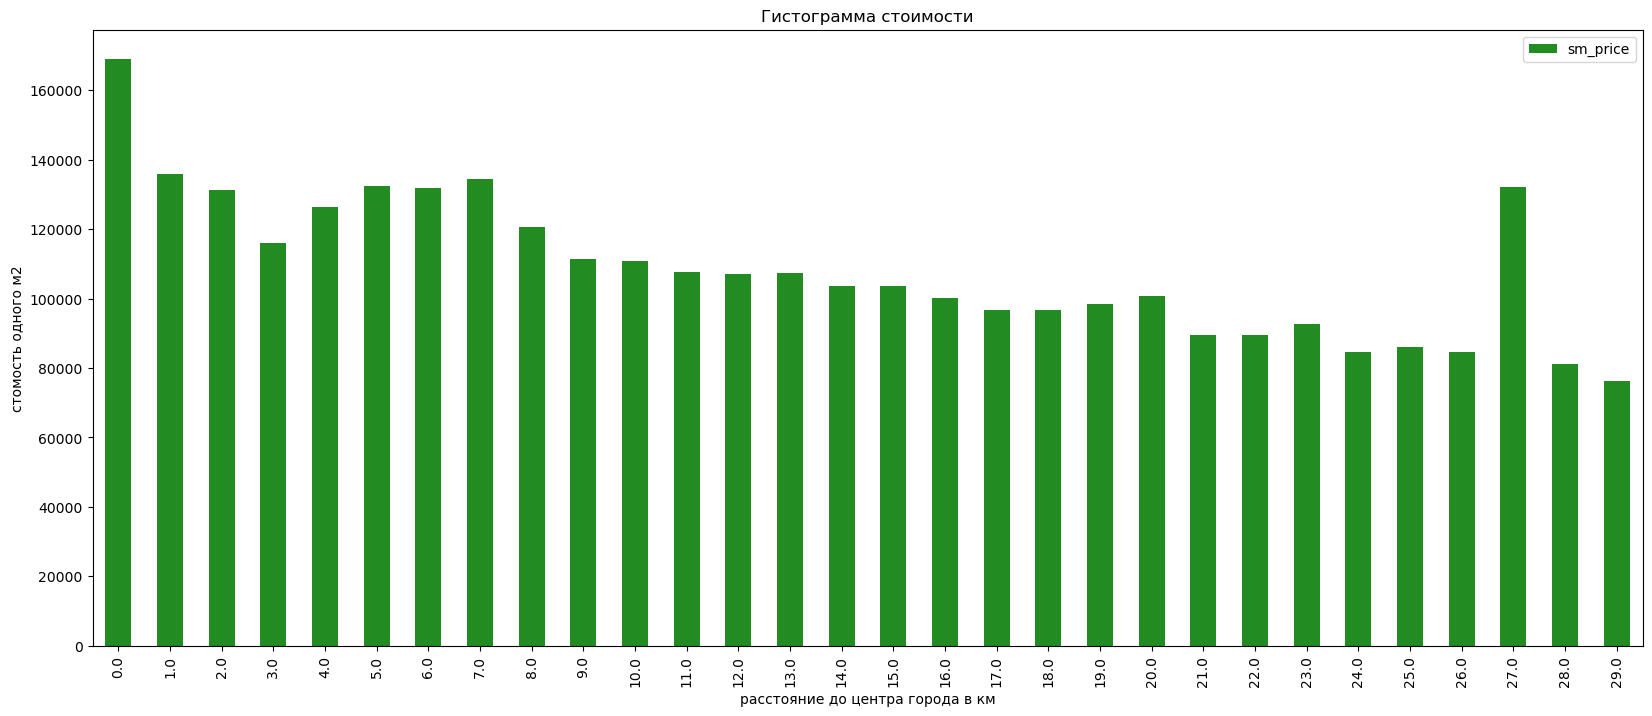

In [73]:
#построим гистограмму стоимости за м2

snt_pet_price.plot(kind='bar', x='city_centers_nearest_km', y='sm_price', figsize=(20,8), color='forestgreen')
plt.title('Гистограмма стоимости')
plt.xlabel('расстояние до центра города в км')
plt.ylabel('стомость одного м2')
plt.show()

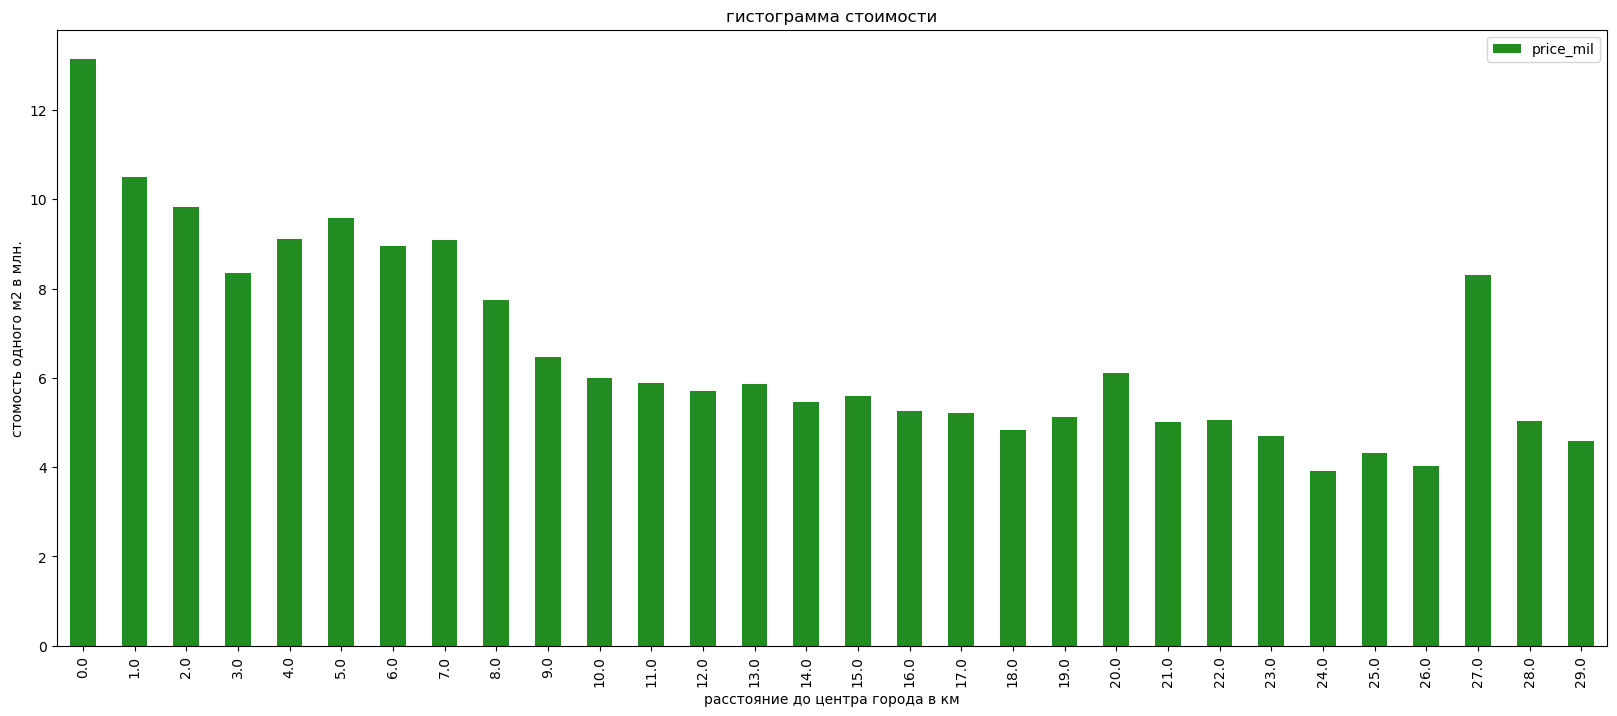

In [69]:
#построим гистограмму по стоимости в млн.

snt_pet_price.plot(kind='bar', x='city_centers_nearest_km', y='price_mil', figsize=(20,8), color='forestgreen')
plt.title('гистограмма стоимости')
plt.xlabel('расстояние до центра города в км')
plt.ylabel('стомость одного м2 в млн.')
plt.show()
plt.show()

**Вывод:** дороже всего квартиры в центре города, мы видим, что есть прямая зависимость стоимости от расстояния.

Есть небольшой выброс на 27км, посмотрим в чем тут дело.

In [78]:
snt_pet.query('city_centers_nearest_km == 27.0')

,total_images,price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sm_price,day_of_the_week,month_exposition,year_exposition,floor_type,city_centers_nearest_km,price_mil
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,0.0,NaN,128.0,193918.918919,1,11,2017,0,27.0,14.35
5961,6,2250000.0,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,0.0,NaN,178.0,70312.500000,1,2,2018,2,27.0,2.25


*Все дело в том, что на расстоянии 27км от центра города представлено всего два объекта и стоимость одного из них довольно высокая.*

## Общий вывод

*Мы изучили данные объявлений по продаже квартир в г. Санкт-Петербурге и Ленинградской области, предоставленные нам сервисом Яндекс Недвижимость. Основные выводы, которые можно сделать по результатам исследования:*

* В данных имеется большое количество пропущенных значений. Часть пропусков было преобразовано или заполнено. Оставшаяся часть в основном связана с отсутствием информации о расстоянии до ближайших объектов, таких как аэропорт, парки, водоемы. Пропуски в данных могут означать, что продавец не владеет этой информацией или не посчитал нужным ее заполнять, также не забываем о вероятности технической ошибки, которая повлекла потерю данных.
* Присутствует также ряд аномальных значений. Для недопущения искажения конечных результатов исследования было решено убрать 1% аномальных значений.
* Основная часть объявлений имеет следующие параметры объектов:
    * общая площадь - 30-45 м2;
    * жилая площади - 16-18 м2;
    * площадью кухни - 5-11 м2;
    * стоимость: от 2,5 до 6 млн. руб.;
    * количеством комнат 1-2;
    * локация: окраины Санкт-Петербурга или в область.
* Объявления о продаже публикуются чаще в рабочие дни. В начале года и по конец, летом объявлений меньше.
* К сожалению, мы не можем достоверно учитывать, что день снятия объявления означает день продажи квартиры, т.к. имеем большое количество выбросов на 44 и 60 день. Возможно, это связано с периодом бесплатного размещения объявления.
* На стоимость объектов в большей степени влияют площадь и количество комнат. В меньшей степени - этаж, на котором расположено помещение.
* в 2017 и 2018 годах количество размещенных объявлений в разы больше, чем в остальные года.
* Размеры продаваемой жилплощади с годами уменьшались.
* Самой популярной локацией ожидаемо является Санкт-Петербург. Медианная стоимость объектов в городе также ожидаемо выше, чем в области.
* Стоимость объектов напрямую зависит от расстояния до центра города. Чем ближе к центру, тем дороже. 